In [1]:
import os
import pandas as pd

In [2]:
os.listdir("./Sales_Data")

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
# Merge CSV files
all_months_data = pd.DataFrame()
files = [file for file in os.listdir("./Sales_Data")]
for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    all_months_data = pd.concat([all_months_data, df])

In [4]:
# Save to CSV file
all_months_data.to_csv("all_data.csv", index=False)

In [5]:
# Read saved CSV
data = pd.read_csv("all_data.csv")

In [6]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
# Drop missing values
all_data = data.dropna(how="all").reset_index(drop=True)

In [13]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
# Check duplicates
all_data.duplicated().value_counts()

False    185687
True        618
dtype: int64

In [17]:
# Drop Duplicates
all_data.drop_duplicates(inplace=True)

In [18]:
all_data.duplicated().value_counts()

False    185687
dtype: int64

In [20]:
temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [21]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [26]:
## Convert to numeric
all_data.loc[:, "Quantity Ordered"] = pd.to_numeric(all_data.loc[:, "Quantity Ordered"])
all_data.loc[:, "Price Each"] = pd.to_numeric(all_data.loc[:, "Price Each"])

C:\Users\user\AppData\Local\Temp\ipykernel_11052\1168402622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, "Quantity Ordered"] = pd.to_numeric(all_data.loc[:, "Quantity Ordered"])
C:\Users\user\AppData\Local\Temp\ipykernel_11052\1168402622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.loc[:, "Price Each"] = pd.to_numeric(all_data.loc[:, "Price Each"])


In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [32]:
# Features Engineering
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [33]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

C:\Users\user\AppData\Local\Temp\ipykernel_11052\2617628323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [35]:
# Create month column
all_data["month"] = all_data["Order Date"].dt.month

C:\Users\user\AppData\Local\Temp\ipykernel_11052\905421889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["month"] = all_data["Order Date"].dt.month


In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [37]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

C:\Users\user\AppData\Local\Temp\ipykernel_11052\1904175423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]


In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


# Let's do analysis

### What was the best month for sales? How much was earned that month?

In [39]:
# Total sales
all_data["Sales"].sum()

34465537.94

In [40]:
monthly_sales = all_data.groupby("month")["Sales"].sum().round().reset_index(name="Total_Sales")

In [42]:
monthly_sales.sort_values(by="Total_Sales", ascending=False)

,month,Total_Sales
11,12,4608296.0
9,10,3734778.0
3,4,3389218.0
10,11,3197875.0
4,5,3150616.0
2,3,2804973.0
6,7,2646461.0
5,6,2576280.0
7,8,2241083.0
1,2,2200078.0


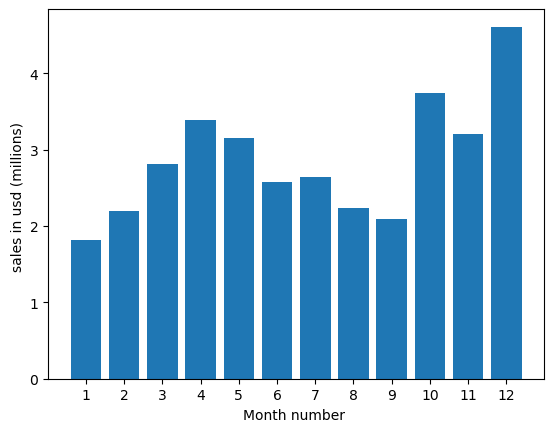

In [43]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,monthly_sales['Total_Sales']/1000000)
plt.xticks(months)
plt.ylabel('sales in usd (millions) ')
plt.xlabel('Month number ')
plt.show()

In [44]:
dec_data = all_data.query("month == 12")
dec_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
30307,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
30308,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
30309,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
30310,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
30311,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


In [45]:
dec_group = dec_data.groupby("Product")["Order ID"].count().reset_index()
dec_group.sort_values(by="Order ID", inplace=True, ascending=False)
dec_group

,Product,Order ID
15,USB-C Charging Cable,2979
12,Lightning Charging Cable,2887
5,AAA Batteries (4-pack),2828
4,AA Batteries (4-pack),2716
17,Wired Headphones,2537
6,Apple Airpods Headphones,2051
7,Bose SoundSport Headphones,1803
2,27in FHD Monitor,959
18,iPhone,906
1,27in 4K Gaming Monitor,861


### What city sold the most product?

In [46]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [47]:
# GET CITY
def get_city(address):
    return address.split(",")[1].strip()

#GET STATE
def get_state(address):
    return address.split(",")[2].split()[0]

In [49]:
all_data["city"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)}, {get_state(x)}")

In [50]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [53]:
sales_by_city = all_data.groupby("city").Sales.sum().round().reset_index(name="Sales").sort_values(by="Sales", ascending=False)

In [54]:
sales_by_city

,city,Sales
8,"San Francisco, CA",8254744.0
4,"Los Angeles, CA",5448304.0
5,"New York City, NY",4661867.0
2,"Boston, MA",3658628.0
0,"Atlanta, GA",2794199.0
3,"Dallas, TX",2765374.0
9,"Seattle, WA",2745046.0
7,"Portland, OR",1870011.0
1,"Austin, TX",1818044.0
6,"Portland, ME",449321.0


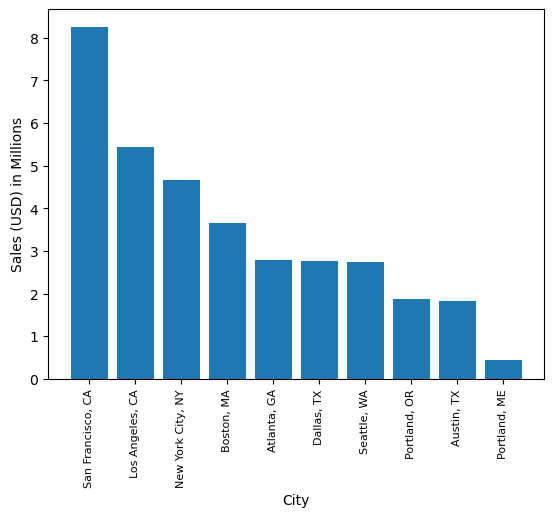

In [58]:
import matplotlib.pyplot as plt

plt.bar(sales_by_city['city'], sales_by_city['Sales']/1000000)
plt.ylabel('Sales (USD) in Millions')
plt.xlabel('City')
plt.xticks(sales_by_city['city'].values, rotation='vertical', size=8)
plt.show()

###  What time of the day do we make the most sales

In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [60]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minutes"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [65]:
sales_per_hr = all_data.groupby("Hour")["Order ID"].count().reset_index(name="Orders")
sales_per_hr.sort_values(by="Orders", ascending=False)

,Hour,Orders
19,19,12886
12,12,12573
11,11,12392
18,18,12263
20,20,12218
13,13,12115
14,14,10965
10,10,10929
21,21,10905
17,17,10884


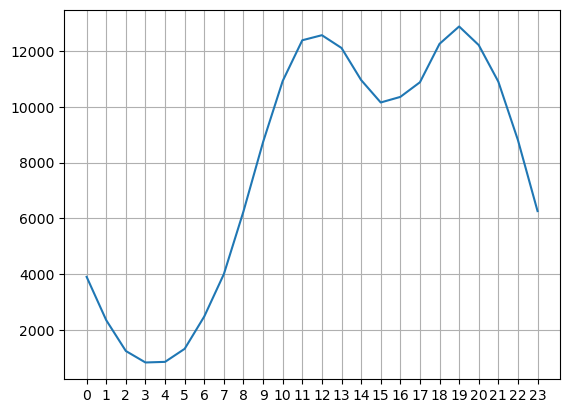

In [66]:
import matplotlib.pyplot as plt
plt.plot(sales_per_hr['Hour'], sales_per_hr['Orders'])
plt.xticks(sales_per_hr['Hour'])
plt.grid()
plt.show()

### What products are most often sold together?

In [67]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [68]:
df = all_data.copy()

In [70]:
df["Grouped"] = all_data.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,Minutes,Grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46,USB-C Charging Cable
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30,Bose SoundSport Headphones
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38,"Google Phone,Wired Headphones"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27,Wired Headphones


In [71]:
# drop duplicates
df = df[["Order ID", 'Grouped']].drop_duplicates()

In [72]:
df.head()

,Order ID,Grouped
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,"Google Phone,Wired Headphones"
4,176561,Wired Headphones
5,176562,USB-C Charging Cable


In [75]:
from itertools import combinations
from collections import Counter

count = Counter()
for row  in df["Grouped"]:
    row_list = row.split(",")
    combine = combinations(row_list, 2)
    count.update(Counter(combine))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### What product sold the most? Why do you think it sold the most?

In [77]:
sales_per_product = all_data.groupby("Product").sum()["Quantity Ordered"].reset_index(name="Quantity")
sales_per_product.sort_values(by="Quantity", ascending=False)

,Product,Quantity
5,AAA Batteries (4-pack),30986
4,AA Batteries (4-pack),27615
15,USB-C Charging Cable,23931
12,Lightning Charging Cable,23169
17,Wired Headphones,20524
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
2,27in FHD Monitor,7541
18,iPhone,6847
1,27in 4K Gaming Monitor,6239


In [79]:
prices = all_data.groupby('Product').mean()['Price Each'].reset_index(level=0, name='Price')

C:\Users\user\AppData\Local\Temp\ipykernel_11052\3574501179.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prices['Product'].values, rotation='vertical', size=8)
C:\Users\user\AppData\Local\Temp\ipykernel_11052\3574501179.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


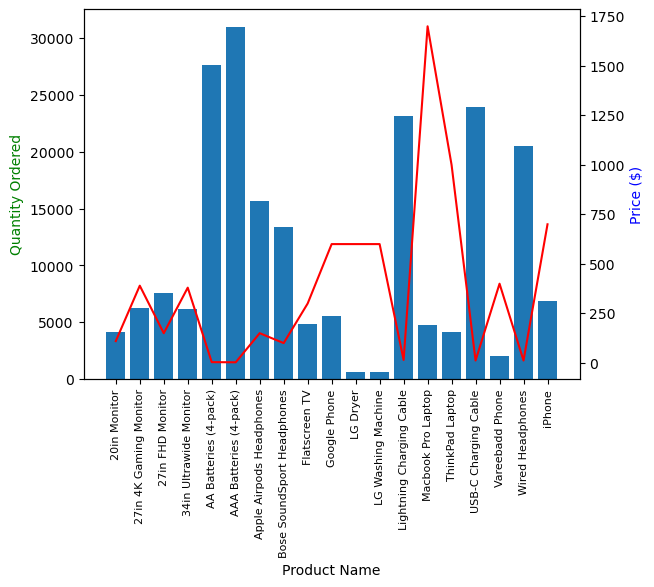

In [80]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(prices['Product'], prices['Price'], color='red')
ax1.bar(sales_per_product['Product'], sales_per_product['Quantity'])

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(prices['Product'].values, rotation='vertical', size=8)
fig.show()